In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_7800\2950996752.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
# selenium 4 버전으로 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# TIP !! 3,4 버전 코드가 조금 다름
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['마포구',
 '강서구',
 '노원구',
 '동작구',
 '금천구',
 '영등포구',
 '용산구',
 '성북구',
 '서초구',
 '광진구',
 '관악구',
 '종로구',
 '구로구',
 '중구',
 '강북구',
 '강남구',
 '성동구',
 '강동구',
 '송파구',
 '도봉구',
 '양천구',
 '동대문구',
 '중랑구',
 '서대문구',
 '은평구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("./chromedriver.exe", options=options)
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_7800\1177500784.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe", options=options)


In [12]:
edi_info = []


for gu in gu_list:
    driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
    driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

692

In [13]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
687,연희삼거리점,서대문구,서울 서대문구 연희로 117 (연희동)
688,이화여대점,서대문구,"서울 서대문구 이화여대길 26 (대현동, 이화빌딩)"
689,충정로3가점,서대문구,"서울 서대문구 경기대로 26-26 (충정로3가, 더스타일하우스디센트럴)"
690,홍은사거리점,서대문구,"서울 서대문구 통일로 510 (홍은동, 북한산 더샵)"
691,홍제역점,서대문구,서울 서대문구 홍제동


In [14]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,마포구,35
1,강서구,26
2,노원구,13
3,동작구,11
4,금천구,13
5,영등포구,41
6,용산구,24
7,성북구,15
8,서초구,48
9,광진구,19


In [15]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,마포구,38
1,강서구,45
2,노원구,31
3,동작구,22
4,금천구,23
5,영등포구,41
6,용산구,14
7,성북구,32
8,서초구,29
9,광진구,24


In [16]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,마포구,38,35,3
1,강서구,45,26,19
2,노원구,31,13,18
3,동작구,22,11,11
4,금천구,23,13,10
5,영등포구,41,41,0
6,용산구,14,24,-10
7,성북구,32,15,17
8,서초구,29,48,-19
9,광진구,24,19,5


In [17]:
# 안됨 !!!!!!!
# 한국어 패치 적용
# from matplotlib import rc
# import matplotlib.font_manager as fm

# fm.get_fontconfig_fonts()

# # 디렉토리 및 파일 이름에 맞추어 변경
# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_7800\2958117533.py:5: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [19]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXSizeFourSym',
 'cmmi10',
 'cmr10',
 'cmb10',
 'STIXSizeOneSym',
 'cmss10',
 'DejaVu Serif',
 'STIXGeneral',
 'Lucida Bright',
 'Franklin Gothic Medium',
 'Microsoft Tai Le',
 'Corbel',
 'Segoe UI',
 'Segoe UI Variable',
 'Constantia',
 'Georgia',
 'Bodoni MT',
 'Consolas',
 'Mistral',
 'Parchment',
 'NanumBarunpen',
 'Magneto',
 'Cambria',
 'Maiandra GD',
 'Yu Gothic',
 'Goudy Old Style',
 'Arial',
 'Jokerman',
 'Microsoft JhengHei',
 'Harrington

In [21]:
# 음수 마이너스 표시가 깨질 때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

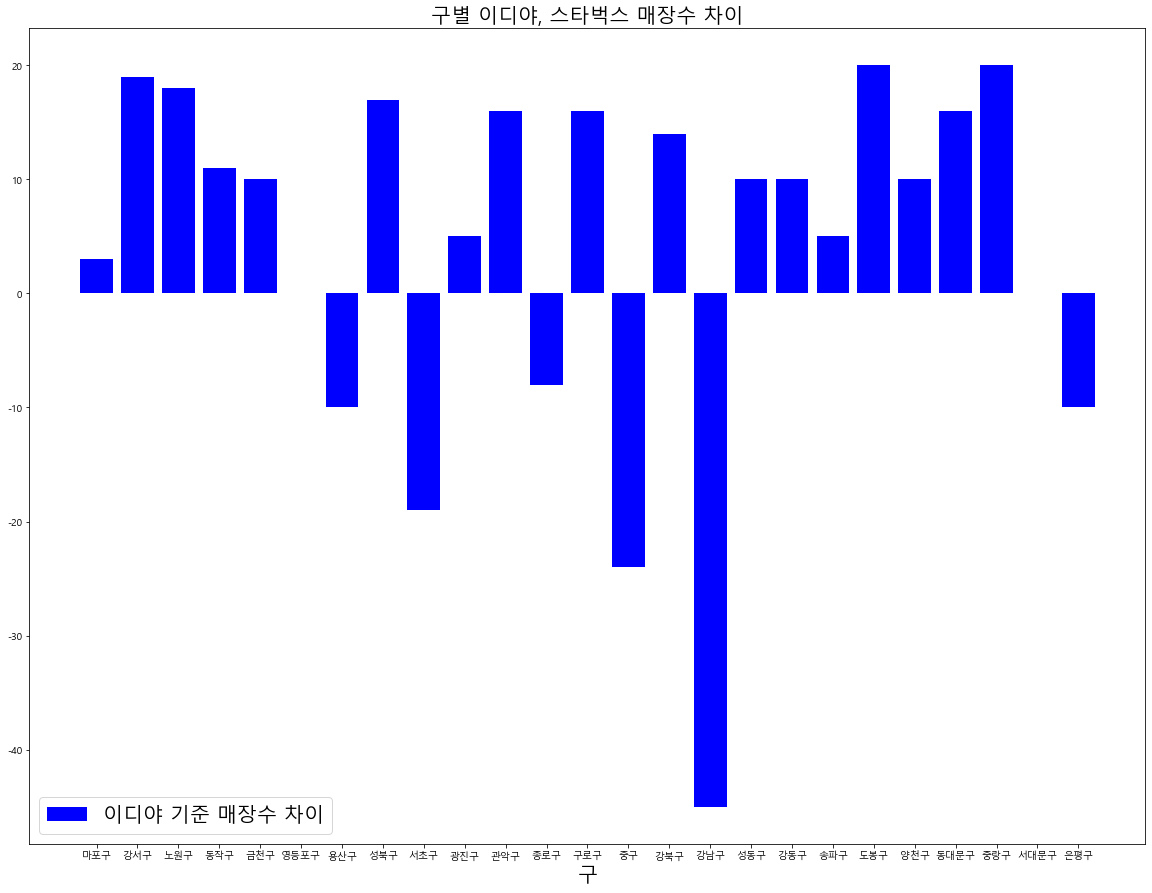

In [22]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()